# Fragestellung und Datenbeschaffung

### 1.1 Titel

### 1.2 Fragestellung

- Welche Faktoren beeinflussen das Risiko an Diabetes zu erkranken?
- Wie sehr repräsentiert unser Datenset die Bevölkerung der USa



### 1.3 Datenquelle

https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes?resource=download

### 1.4 Daten beschaffen und laden

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import ConnectionPatch


In [2]:
df = pd.read_csv('data/Healthcare-Diabetes.csv')

## 2. Datenvorbereitung

### Beschreibung
Das Datenset enthält eine Vielzahl von Risikofaktoren, die mit der Entstehung von Diabetes in Verbindung stehen, sowie allgemeine Gesundheitsdaten wie Alter, Geschlecht und andere relevante Parameter. In der Spalte Outcome ist definiert, ob eine Person Diabetes hat (1) oder nicht (0).

Mit Hilfe dieses Datensatzes können wir untersuchen, ob bestimmte Faktoren ein erhöhtes Risiko für die Entwicklung von Diabetes anzeigen. Dies ermöglicht es, frühzeitig potenzielle Risikopatienten zu identifizieren und gegebenenfalls präventive Massnahmen zu ergreifen.

Es ist wichtig zu beachten, dass sich dieser Datensatz ausschliesslich auf Diabetes Typ 2 konzentriert. Typ 2 Diabetes ist eine erworbene Krankheit, die meist im Erwachsenenalter aufgrund von Lebensstilfaktoren und Alter auftritt. Im Gegensatz dazu ist Typ 1 Diabetes eine Autoimmunerkrankung, welche die Insulin-produzierenden Zellen der Bauchspeicheldrüse angreift.

Ein weiterer relevanter Punkt ist, dass alle Personen in diesem Datensatz bereits mit Risikofaktoren für Diabetes identifiziert wurden. Es handelt sich also nicht um eine Stichprobe gesunder Menschen, sondern um eine Population mit erhöhtem Risiko, die für präventive und diagnostische Studien besonders wertvoll ist.

### 2.1 Analyse
- Die Rohdaten liegen im Long-Format vor
- Jede Zeile repräsentiert einen einzelnen Patienten mit den entsprechenden Gesundheitsdaten
- Wenn ein Wert als Null angegeben ist, bedeutet dies, dass die Daten für diesen Parameter nicht erfasst wurden


In [3]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


## 3. Rohdatenanalyse



### 3.1 Allgemein

- Das Datenset enthält die folgenden Variablen: ID, Anzahl der Schwangerschaften, Glukosewerte, Blutdruck, Hautdicke, Insulinwerte, BMI, familiäres Diabetesrisiko, Alter sowie das Outcome (Diabetes: Ja/Nein)
- Das Datenset umfasst Daten von 2768 Patienten

In [4]:
df.dtypes

Id                            int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
df.shape

(2768, 10)

### 3.2 BMI
Es ist deutlich erkennbar, dass die Mehrheit der Personen in diesem Datenset tendenziell einen erhöhten Body-Mass-Index (BMI) aufweist. Der durchschnittliche BMI der Patienten im Datenset liegt bei 32,1374. Dieser Wert deutet darauf hin, dass viele der im Datenset enthaltenen Personen als übergewichtig oder fettleibig eingestuft werden, da der BMI-Wert von 30 oder mehr allgemein als Schwelle für Übergewicht gilt.

In [6]:
# Der Durchschnitt hier unterscheidet sich von der Graphik unten... 32.13 versus 32.60?

df["BMI"].mean()
print("BMI Durchschnitt: ",df["BMI"].mean())

BMI Durchschnitt:  32.13739161849711


Die Analyse des Diagramms zeigt, dass es im Datensatz einige Einträge gibt, bei denen der BMI-Wert auf Null gesetzt ist. Diese Null-Werte deuten darauf hin, dass der BMI für diese Patienten nicht erfasst wurde, was den Durchschnittswert verfälscht. Es handelt sich um 39 Patienten, bei denen der BMI fehlt und daher als Null angegeben ist. Wenn diese 39 Patienten aus der Berechnung des Durchschnitts ausgeschlossen werden, ergibt sich ein korrigierter Durchschnitt von 32,5966, der den tatsächlichen BMI der restlichen Patienten genauer widerspiegelt.


In [7]:
unrealistic_bmi_count = (df["BMI"] == 0).sum()
clean_bmi_mean = df.loc[df["BMI"] != 0, "BMI"].mean()

print(f"Anzahl unrealistischer BMI-Werte: {unrealistic_bmi_count}")
print(f"Bereinigter BMI-Durchschnitt: {clean_bmi_mean:.2f}")

Anzahl unrealistischer BMI-Werte: 39
Bereinigter BMI-Durchschnitt: 32.60


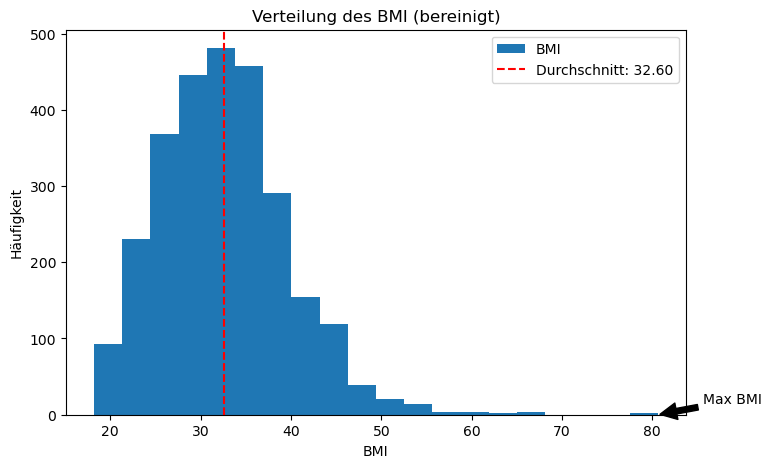

In [8]:
plt.figure(figsize=(8, 5))
df.loc[df["BMI"] != 0, "BMI"].plot(kind='hist', bins=20)

plt.title('Verteilung des BMI (bereinigt)')
plt.xlabel('BMI')
plt.ylabel('Häufigkeit')
plt.axvline(clean_bmi_mean, color='red', linestyle='dashed', linewidth=1.5, label=f"Durchschnitt: {clean_bmi_mean:.2f}")
plt.annotate('Max BMI', xy=(df["BMI"].max(), 0), xytext=(df["BMI"].max() + 5, 15),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.legend(loc='upper right')
plt.show()

### 3.2 Blutdruck 

Der durchschnittliche Blutdruck im Datensatz liegt bei 69,13 mmHg. Wahrscheinlich handelt es sich bei diesen Werten um diastolische Blutdruckwerte. Es ist jedoch wichtig zu beachten, dass dieser Durchschnitt auch Blutdruckwerte von 0 mmHg umfasst, die im Datensatz als fehlende Werte für die entsprechenden Patienten interpretiert werden. 

Diese Null-Werte verzerren den Durchschnitt. Im folgenden Diagramm wurden die Null-Werte entfernt, um eine genauere Darstellung des tatsächlichen durchschnittlichen Blutdrucks der Patienten zu ermöglichen.

In [9]:
blood_pressure_mean = df["BloodPressure"].mean()
print(f"Blutdruck Durchschnitt: {blood_pressure_mean:.2f}")

Blutdruck Durchschnitt: 69.13


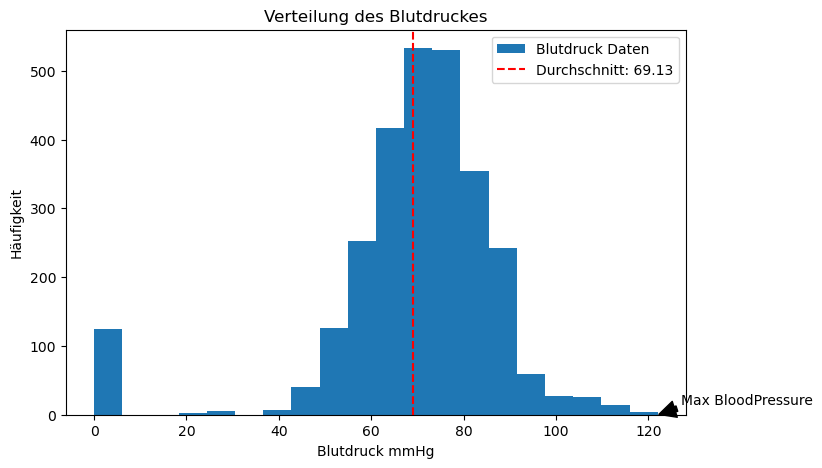

In [10]:
plt.figure(figsize=(8, 5))
df["BloodPressure"].plot(kind='hist', bins=20)

plt.title('Verteilung des Blutdruckes')
plt.xlabel('Blutdruck mmHg')
plt.ylabel('Häufigkeit')

plt.axvline(blood_pressure_mean, color='red', linestyle='dashed', linewidth=1.5, label=f"Durchschnitt: {blood_pressure_mean:.2f}")

plt.annotate('Max BloodPressure', 
             xy=(df["BloodPressure"].max(), 0), 
             xytext=(df["BloodPressure"].max() + 5, 15),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.legend(['Blutdruck Daten', f"Durchschnitt: {blood_pressure_mean:.2f}"], loc='upper right')

plt.show()


In [11]:
unrealistic_bp_count = (df["BloodPressure"] == 0).sum()
clean_bp_mean = df.loc[df["BloodPressure"] != 0, "BloodPressure"].mean()

print(f"Anzahl unrealistischer Blutdruck-Werte: {unrealistic_bp_count}")
print(f"Bereinigter Blutdruck-Durchschnitt: {clean_bp_mean:.2f}")

Anzahl unrealistischer Blutdruck-Werte: 125
Bereinigter Blutdruck-Durchschnitt: 72.40


In [16]:
plt.figure(figsize=(8, 5))
df_cleane["BloodPressure"].plot(kind='hist', bins=20)

plt.title('Verteilung des Blutdruckes (Bereinigt)')
plt.xlabel('Blutdruck (mmHg)')
plt.ylabel('Häufigkeit')

plt.axvline(clean_bp_mean, color='red', linestyle='dashed', linewidth=1.5, label=f"Durchschnitt: {clean_bp_mean:.2f}")

plt.annotate(f'Max BloodPressure: {max_bp} mmHg', 
             xy=(max_bp, max_bp_freq), 
             xytext=(max_bp + 5, max_bp_freq + 10),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10)

plt.legend(['BloodPressure-Daten'], loc='upper right')
plt.legend(['Blutdruck Daten (bereinigt)', f"Durchschnitt: {clean_bp_mean:.2f}"], loc='upper right')

plt.show()

NameError: name 'df_cleane' is not defined

<Figure size 800x500 with 0 Axes>

### 3.3 Alter
Das Durchschnittsalter der Patienten im Datensatz beträgt 33 Jahre. Dieser Wert wird jedoch durch eine relativ hohe Anzahl sehr junger Patienten beeinflusst, die den Altersdurchschnitt deutlich nach unten ziehen. Es ist daher zu beachten, dass viele der Patienten in diesem Datensatz jünger sind, was den Durchschnittswert verzerrt und möglicherweise nicht das typische Alter für Diabetes-Risiken widerspiegelt.

In [321]:
age_raw = df["Age"].mean()
print(f"Altersdurchschnitt: {age_raw:.2f}")

Altersdurchschnitt: 33.13


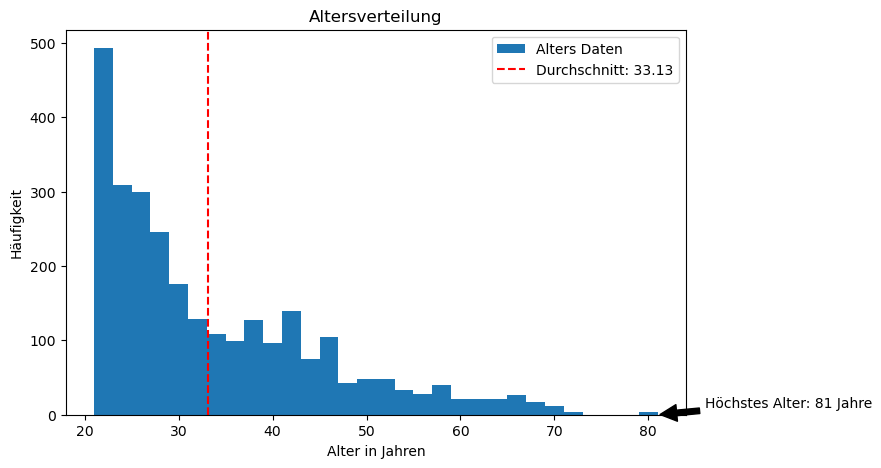

In [322]:
plt.figure(figsize=(8, 5))
df["Age"].plot(kind='hist', bins=30)

plt.title('Altersverteilung')
plt.xlabel('Alter in Jahren')
plt.ylabel('Häufigkeit')

plt.axvline(age_mean, color='red', linestyle='dashed', linewidth=1.5, label=f"Durchschnitt: {age_mean:.2f}")

plt.annotate(f'Höchstes Alter: {max_age} Jahre', 
             xy=(max_age, 0), 
             xytext=(max_age + 5, 10),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10)

plt.legend(['Alters Daten', f"Durchschnitt: {age_mean:.2f}"], loc='upper right')

plt.show()


### 3.4 Blutzucker
Blutzucker 0 in Datensatz drinn
In zweiter Graphik bereinigt

In [323]:
blood_glucose = df["Glucose"].mean()
print(f"Glucose: {blood_glucose:.2f}")

Glucose: 121.10


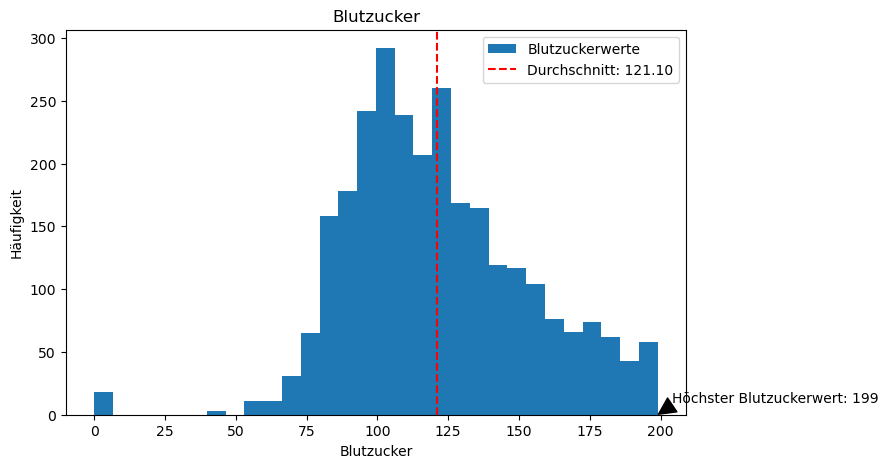

In [324]:
blood_glucose = df["Glucose"].mean()

plt.figure(figsize=(8, 5))
df["Glucose"].plot(kind='hist', bins=30)

plt.title('Blutzucker')
plt.xlabel('Blutzucker')
plt.ylabel('Häufigkeit')

plt.axvline(blood_glucose, color='red', linestyle='dashed', linewidth=1.5, label=f"Durchschnitt: {blood_glucose:.2f}")

max_glucose = df["Glucose"].max()
plt.annotate(f'Höchster Blutzuckerwert: {max_glucose}', 
             xy=(max_glucose, 0), 
             xytext=(max_glucose + 5, 10),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10)

plt.legend(['Blutzuckerwerte', f"Durchschnitt: {blood_glucose:.2f}"], loc='upper right')

plt.show()


Insgesamt 18 Werte mit unrealistischem Nuller Wert

In [325]:
unrealistic_glucose = (df["Glucose"] == 0).sum()
clean_glucose_mean = df.loc[df["Glucose"] != 0, "Glucose"].mean()

print(f"Anzahl unrealistischer Blutzucker-Werte: {unrealistic_glucose}")
print(f"Bereinigter Blutzucker-Durchschnitt: {clean_glucose_mean:.2f}")

Anzahl unrealistischer Blutzucker-Werte: 18
Bereinigter Blutzucker-Durchschnitt: 121.90


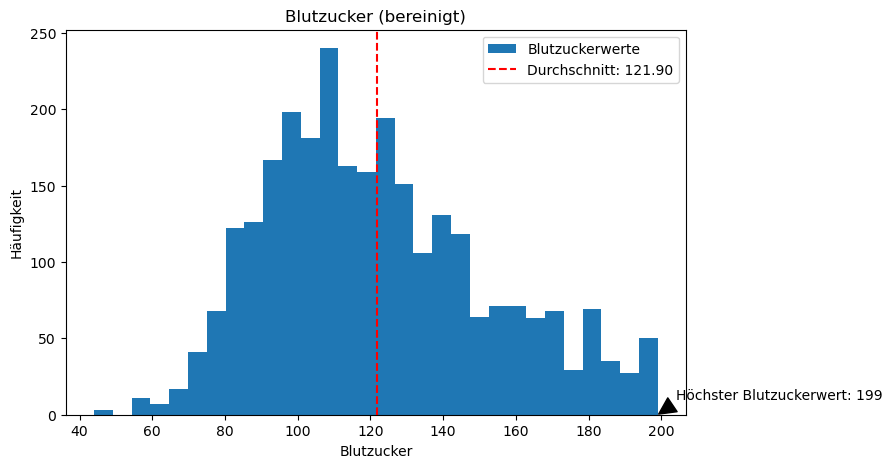

In [326]:
clean_glucose_mean = df["Glucose"].loc[df["Glucose"] != 0].mean()

plt.figure(figsize=(8, 5))
df["Glucose"].loc[df["Glucose"] != 0].plot(kind='hist', bins=30)

plt.title('Blutzucker (bereinigt)')
plt.xlabel('Blutzucker')
plt.ylabel('Häufigkeit')

plt.axvline(clean_glucose_mean, color='red', linestyle='dashed', linewidth=1.5, label=f"Durchschnitt: {clean_glucose_mean:.2f}")

max_glucose = df["Glucose"].max()
plt.annotate(f'Höchster Blutzuckerwert: {max_glucose}', 
             xy=(max_glucose, 0), 
             xytext=(max_glucose + 5, 10),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10)

plt.legend(['Blutzuckerwerte', f"Durchschnitt: {clean_glucose_mean:.2f}"], loc='upper right')

plt.show()


### 3.4 Resultate

In den Patientendaten haben 34,4% der Patienten Diabetes, während 65,6% der Patienten keinen Diabetes haben. Diese Verteilung zeigt, dass ein erheblicher Teil der Patienten im Datensatz an Diabetes leidet, was darauf hindeutet, dass viele der im Datensatz enthaltenen Personen Risikofaktoren für die Krankheit aufweisen. Die restlichen 65,6% ohne Diabetes bieten einen wertvollen Vergleich, um Risikofaktoren und mögliche Präventionsstrategien zu analysieren.

In [327]:
def sum_of_positive ():
    positive = 0
    for result in df["Outcome"]:
        if result == 1:
            positive = positive + 1
    return positive

nr_of_positives = sum_of_positive()
total_outcomes = len(df["Outcome"])
precentage_positive = (nr_of_positives/total_outcomes)*100

print("Patienten mit Diabetes (%):",precentage_positive)


Patienten mit Diabetes (%): 34.39306358381503


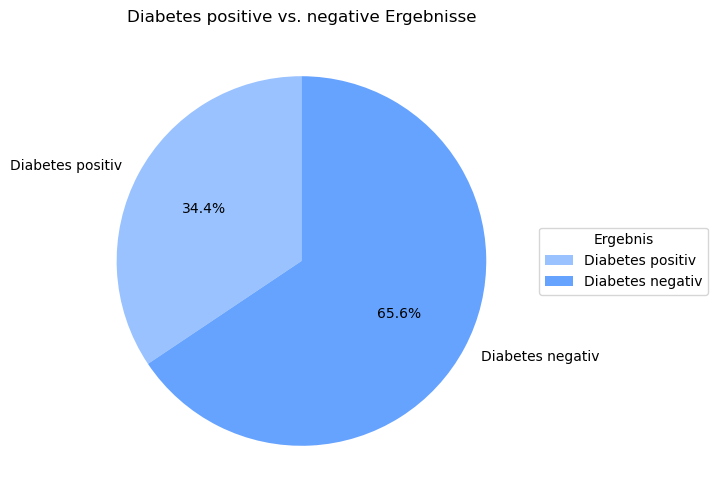

In [328]:
labels = "Diabetes positiv", "Diabetes negativ"
sizes = [nr_of_positives, total_outcomes - nr_of_positives]
colors = ['#99c2ff', '#66a3ff']
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, colors=colors, wedgeprops={'linewidth': 1.2})
ax.legend(labels, title = "Ergebnis", loc= "center left", bbox_to_anchor=(1,0.5))
ax.set_title("Diabetes positive vs. negative Ergebnisse")

plt.show()


## 4. Zweites Datenset

### 4.1 Quelle

https://ourworldindata.org/grapher/diabetes-prevalence

### 4.2 Daten beschaffen und laden

In [329]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import ConnectionPatch


In [330]:
data_worldwide = pd.read_csv('data/diabetes-prevalence.csv')

### 5. Datenvorbereitung

### 5.1 Beschreibung
Die Datenquelle enthält Informationen zur weltweiten Prävalenz von Diabetes in der Bevölkerung, wobei die Daten nach Ländern und Jahren unterteilt sind. Sie bieten einen Überblick darüber, wie sich die Diabetesraten über die Jahre entwickelt haben und ermöglichen Vergleiche zwischen verschiedenen Regionen und Zeiträumen. 

- Die Daten befinden sich im long Format
- Es befinden sich 2768 Daten im Datenset

In [332]:
num_records = df.shape[0]
print(f"Anzahl der Datensätze: {num_records}")

Anzahl der Datensätze: 2768


In [333]:
data_worldwide.dtypes

Entity                                                  object
Code                                                    object
Year                                                     int64
Diabetes prevalence (% of population ages 20 to 79)    float64
dtype: object

In [331]:
data_worldwide.head()

,Entity,Code,Year,Diabetes prevalence (% of population ages 20 to 79)
0,Afghanistan,AFG,2011,7.6
1,Afghanistan,AFG,2021,10.9
2,Albania,ALB,2011,2.8
3,Albania,ALB,2021,10.2
4,Algeria,DZA,2011,7.0


Daten ins wide Format Povotiert. Das verbessert den Überblick

In [44]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

data_worldwide_filtered = data_worldwide[data_worldwide['Year'] != 2000]

print(data_worldwide_filtered.head())

dw_pivot = data_worldwide_filtered.pivot(index='Entity', columns='Year', values='Diabetes prevalence (% of population ages 20 to 79)')

print(df_pivot)

        Entity Code  Year  Diabetes prevalence (% of population ages 20 to 79)
0  Afghanistan  AFG  2011                                                  7.6
1  Afghanistan  AFG  2021                                                 10.9
2      Albania  ALB  2011                                                  2.8
3      Albania  ALB  2021                                                 10.2
4      Algeria  DZA  2011                                                  7.0
Year                                    2011       2021
Entity                                                 
Afghanistan                         7.600000  10.900000
Albania                             2.800000  10.200000
Algeria                             7.000000   7.100000
American Samoa                           NaN  20.300000
Andorra                             5.400000   9.700000
Angola                              2.900000   4.600000
Antigua and Barbuda                12.500000  11.700000
Argentina             

In [43]:
dw_pivot_table = data_worldwide_filtered.pivot_table(index='Entity', columns='Year', values='Diabetes prevalence (% of population ages 20 to 79)')
print(df_pivot_table)

Year                                    2011       2021
Entity                                                 
Afghanistan                         7.600000  10.900000
Albania                             2.800000  10.200000
Algeria                             7.000000   7.100000
American Samoa                           NaN  20.300000
Andorra                             5.400000   9.700000
Angola                              2.900000   4.600000
Antigua and Barbuda                12.500000  11.700000
Argentina                           5.500000   5.400000
Armenia                             8.500000   5.600000
Aruba                              12.400000   4.300000
Australia                           6.600000   6.400000
Austria                             6.600000   4.600000
Azerbaijan                          2.800000   5.600000
Bahamas                            12.100000   8.800000
Bahrain                            19.500000  11.300000
Bangladesh                         10.500000  14

## 6. Rohdatenanalyse

### 6.1 Allgemein

### 6.1 Prävalenz

#### Internationale Prävalenz  

In [334]:
world_2021_df = data_worldwide[data_worldwide["Year"] == 2021]

worldwide_2021_mean = world_2021_df["Diabetes prevalence (% of population ages 20 to 79)"].mean()
print("Durchschnittliche Prävalenz in % (Weltweit, 2021):", worldwide_2021_mean)

world_2011_df = data_worldwide[data_worldwide["Year"] == 2011]

worldwide_2011_mean = world_2011_df["Diabetes prevalence (% of population ages 20 to 79)"].mean()
print("Durchschnittliche Prävalenz in % (Weltweit, 2011):", worldwide_2011_mean)

prevalence_difference = worldwide_2021_mean - worldwide_2011_mean
print("Unterschied der Prävalenz zwischen 2021 und 2011: {:.2f}%".format(prevalence_difference))


Durchschnittliche Prävalenz in % (Weltweit, 2021): 9.035508633628316
Durchschnittliche Prävalenz in % (Weltweit, 2011): 8.014300144748859
Unterschied der Prävalenz zwischen 2021 und 2011: 1.02%


#### Nationale Prävalenz USA

In [335]:
us_2021_df = data_worldwide[(data_worldwide["Code"] == "USA") & (data_worldwide["Year"] == 2021)]

us_2021_mean = us_2021_df["Diabetes prevalence (% of population ages 20 to 79)"].mean()
print("Durchschnittliche Prävalenz in % (USA, 2021):", us_2021_mean)

us_2011_df = data_worldwide[(data_worldwide["Code"] == "USA") & (data_worldwide["Year"] == 2011)]

us_2011_mean = us_2011_df["Diabetes prevalence (% of population ages 20 to 79)"].mean()
print("Durchschnittliche Prävalenz in % (USA, 2011):", us_2011_mean)

prevalence_difference_us = us_2021_mean - us_2011_mean
print("Unterschied der Prävalenz zwischen 2021 und 2011 (USA): {:.2f}%".format(prevalence_difference_us))


Durchschnittliche Prävalenz in % (USA, 2021): 10.7
Durchschnittliche Prävalenz in % (USA, 2011): 9.4
Unterschied der Prävalenz zwischen 2021 und 2011 (USA): 1.30%


##  7. Fragestellung 1

### Welche Faktoren beeinflussen das Risiko an Diabetes zu erkranken?

Die Analyse zeigt, dass Personen mit einem positiven Diabetes-Ergebnis einen signifikant erhöhten BMI aufweisen. Der überwiegende Teil dieser Personen ist übergewichtig, mit nur etwa 3 % der Patienten, die im Normalgewichtbereich liegen. Etwa 21 % gelten sogar als krankhaft fettleibig. Allerdings muss bei dieser Interpretation beachtet werden, dass der durchschnittliche BMI der gesamten Population bereits bei rund 33 liegt, was im Allgemeinen auf Übergewicht hinweist.

Dies bedeutet, dass die gesamte Patientengruppe tendenziell übergewichtig ist. Trotzdem zeigt die Analyse, dass der BMI bei Diabetes-positiven Patienten besonders erhöht ist, was ein weiterer Hinweis auf den Zusammenhang zwischen Übergewicht und dem Risiko für die Entwicklung von Diabetes sein könnte. Es sollte jedoch auch berücksichtigt werden, dass dies nur ein Durchschnittswert ist und weitere Faktoren, wie z. B. individuelle Lebensstile und genetische Prädispositionen, ebenfalls eine Rolle spielen können.

Zusammengefasst lässt sich sagen, dass es zwar keine ungewöhnlich hohen BMI-Werte gibt, die Werte bei den Diabetes-positiven Patienten dennoch einen überdurchschnittlich hohen BMI aufweisen, was eine wichtige Erkenntnis darstellt.

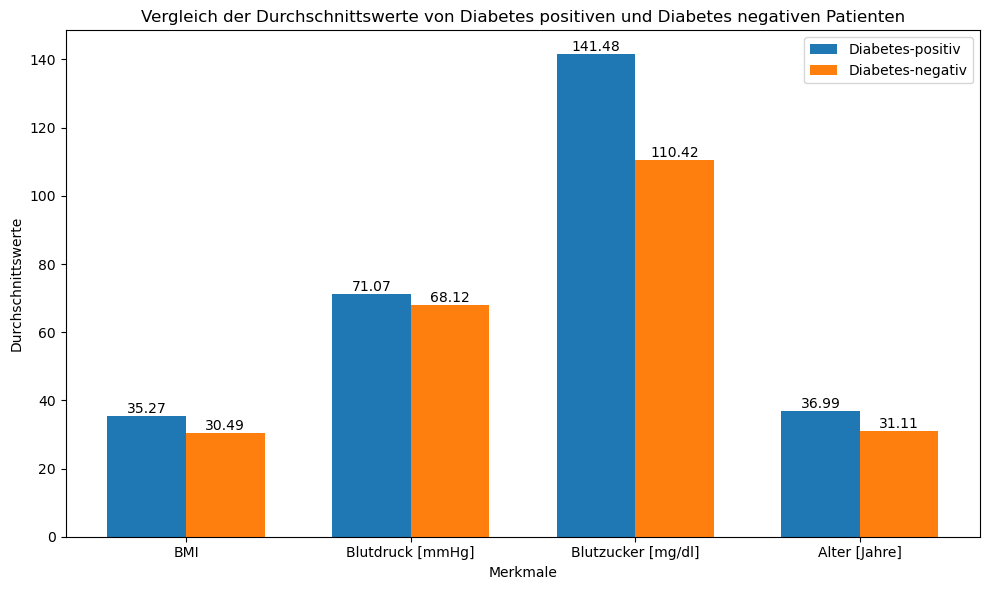

In [341]:
positive_mean = calculate_means(df, 1)
negative_mean = calculate_means(df, 0)

features = ['BMI', 'Blutdruck [mmHg]', 'Blutzucker [mg/dl]', 'Alter [Jahre]']
positive_values = positive_mean.round(2)
negative_values = negative_mean.round(2)

x = np.arange(len(features))

fig, ax = plt.subplots(figsize=(10, 6))

width = 0.35

bars1 = ax.bar(x - width/2, positive_values, width, label='Diabetes-positiv', color='C0')
bars2 = ax.bar(x + width/2, negative_values, width, label='Diabetes-negativ', color='C1')

ax.set_xlabel('Merkmale')
ax.set_ylabel('Durchschnittswerte')
ax.set_title('Vergleich der Durchschnittswerte von Diabetes positiven und Diabetes negativen Patienten')
ax.set_xticks(x)
ax.set_xticklabels(features)
ax.legend()

def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.tight_layout()
plt.show()


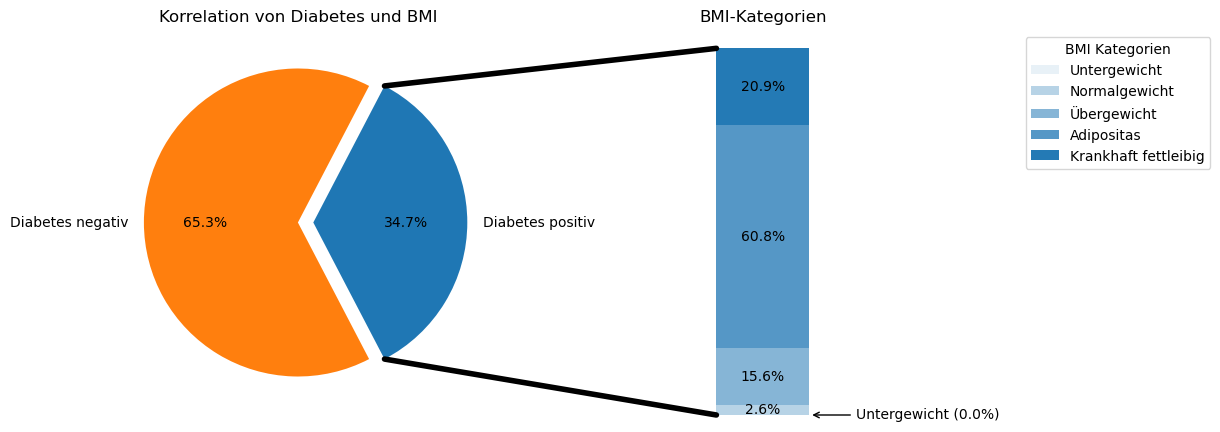

In [337]:
df_non_zero = df[df['BMI'] > 0]

positive_count = (df_non_zero['Outcome'] == 1).sum()
negative_count = (df_non_zero['Outcome'] == 0).sum()
total = positive_count + negative_count

positive_ratio = positive_count / total
negative_ratio = negative_count / total

def get_bmi_category(bmi):
    if bmi < 18.5:
        return 'Untergewicht'
    elif bmi < 25:
        return 'Normalgewicht'
    elif bmi < 30:
        return 'Übergewicht'
    elif bmi < 40:
        return 'Adipositas'
    else:
        return 'Krankhaft fettleibig'

positive_df = df_non_zero[df_non_zero['Outcome'] == 1].copy()
positive_df['BMI_Category'] = positive_df['BMI'].apply(get_bmi_category)

bmi_counts = positive_df['BMI_Category'].value_counts()
bmi_ratios = bmi_counts / bmi_counts.sum()

bmi_categories_order = ['Untergewicht', 'Normalgewicht', 'Übergewicht', 'Adipositas', 'Krankhaft fettleibig']
bmi_ratios_ordered = [bmi_ratios.get(cat, 0) for cat in bmi_categories_order]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.subplots_adjust(wspace=0)

labels = ['Diabetes positiv', 'Diabetes negativ']
ratios = [positive_ratio, negative_ratio]
explode = [0.1, 0]
angle = -180 * ratios[0]

wedges, *_ = ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode, colors=['C0', 'C1'])
ax1.set_title("Korrelation von Diabetes und BMI")

width = 0.5
bottom = 0

for j, (height, category) in enumerate(zip(bmi_ratios_ordered, bmi_categories_order)):
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0',
                 alpha=0.1 + 0.22 * j, label=category)
    label_text = f"{category} ({height:.1%})"
    bar_center = bottom + height / 2.0
    
    if height < 0.02:
        ax2.annotate(
            label_text,                      
            xy=(0 + width/2, bar_center),    
            xytext=(0.5, bar_center),        
            arrowprops=dict(arrowstyle="->", lw=1),
            va='center'
        )
    else:
        ax2.bar_label(bc, labels=[f"{height:.1%}"], label_type='center')
    
    bottom += height

ax2.set_title("BMI-Kategorien")
ax2.legend(title='BMI Kategorien', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.axis('off')
ax2.set_xlim(-2.5 * width, 2.5 * width)

positive_wedge = wedges[0]
theta1, theta2 = positive_wedge.theta1, positive_wedge.theta2
center, r = positive_wedge.center, positive_wedge.r
bar_height = sum(bmi_ratios_ordered)

x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()


## 8. Fragestellung 2

### Wie sehr repräsentiert unser Datenset die Bevölkerung der USA?